# Análise exploratória dos anúncios de imóveis do site OLX

- Os anúncios correspondem a imóveis a venda ou para alugar do site OLX.
- A base de dados foi extraída do site e possui anúncios de todos os estados.
- Foi extraída apenas uma amostra de anúncios de cada estado, portanto nessa base não há todos os anúncios de imóveis do site.
- **Objetivo**: Fazer uma análise exploratória dos dados contidos nos anúncios de imóveis do site OLX.

#### Importando as bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados extraída 

In [2]:
df = pd.read_csv('imoveisolx.csv')
df.head()

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,url
0,Apartamentos,Venda - apartamento padrão,2,1,1,Churrasqueira,NaN,69915354,Rio Branco,AC,Residencial Araçá,https://ac.olx.com.br/acre/imoveis/apartamento...
1,Casas,Venda - casa em rua pública,3,4,2,"Varanda, Churrasqueira",NaN,69901381,Rio Branco,AC,Conjunto Guiomard Santos,https://ac.olx.com.br/acre/imoveis/linda-casa-...
2,Casas,Venda - casa em rua pública,3,5 ou mais,2,"Piscina, Varanda, Churrasqueira",NaN,69915500,Rio Branco,AC,Jardim de Alah,https://ac.olx.com.br/acre/imoveis/linda-casa-...
3,Apartamentos,Venda - apartamento padrão,3,4,3,"Área de serviço, Armários embutidos, Armários ...","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,NaN,https://ac.olx.com.br/acre/imoveis/villa-lobos...
4,Casas,Venda - casa em rua pública,2,2,2,"Área de serviço, Armários na cozinha, Varanda",NaN,69900000,Rio Branco,AC,NaN,https://ac.olx.com.br/acre/imoveis/rua-conquis...


#### Verificando o número de linhas e o número de colunas do dataframe 

In [4]:
sh = df.shape
print(f"Número de linhas é {sh[0]} e número de colunas é {sh[1]}")

Número de linhas é 204862 e número de colunas é 12


#### Obtendo as informações do dataframe 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204862 entries, 0 to 204861
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   categoria            204862 non-null  object
 1   tipo                 198578 non-null  object
 2   quartos              193206 non-null  object
 3   banheiros            185996 non-null  object
 4   vagas_garagem        179957 non-null  object
 5   detalhes_imovel      121287 non-null  object
 6   detalhes_condominio  84463 non-null   object
 7   cep                  204862 non-null  int64 
 8   cidade               204857 non-null  object
 9   estado               204862 non-null  object
 10  bairro               173547 non-null  object
 11  url                  204862 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.8+ MB


Observe que a única coluna numérica do dataframe é a coluna de cep. Portanto, dado o objetivo aqui, preciso transformar em numérica algumas colunas do dataframe, tal como: quartos, banheiros, vagas_garagem.

Antes de fazer a transformação das colunas, vou verificar os valores únicos de cada uma.

#### Verificando os valores únicos das colunas 'quartos', 'banheiros' e 'vagas_garagem' 

Valores únicos da coluna quartos

In [8]:
df.quartos.unique()

array(['2', '3', '4', '1', nan, '5 ou mais'], dtype=object)

Valores únicos da coluna banheiros

In [9]:
df.banheiros.unique()

array(['1', '4', '5 ou mais', '2', '3', '0', nan], dtype=object)

Valores únicos da coluna vagas_garagem

In [10]:
df.vagas_garagem.unique()

array(['1', '2', '3', '4', '0', nan, '5 ou mais', '6', '7'], dtype=object)

#### Substituindo valores NaN das colunas 'quartos', 'banheiros' e 'vagas_garagem'

Escolhi a abordagem de fazer a substituição dos valores NaN dessas colunas ao invés da remoção das linhas que continham essas valores nessas colunas. Notei que já exitiam valores 0 nas colunas 'banheiros' e 'vagas_garagem' e optei por substituir os valores ausentes por 0. 

In [21]:
df[['quartos', 'banheiros', 'vagas_garagem']] = df[['quartos', 'banheiros', 'vagas_garagem']].fillna('0') 

#### Transformando as colunas 'quartos', 'banheiros' e 'vagas_garagem' em numéricas 

Note que há valores '5 ou mais' nas três colunas. Dado que, mesmo tendo valores maiores que 5 na coluna de garagem, ainda tem essa categoria de 5 ou mais. Para transformar as colunas em numéricas, substituirei o ' ou mais' por '' e considerarei apenas o número.

In [24]:
df.quartos = df.quartos.str.replace(' ou mais', '')

In [25]:
df.quartos.unique()

array(['2', '3', '4', '1', '0', '5'], dtype=object)

In [26]:
df.banheiros = df.banheiros.str.replace(' ou mais', '')

In [27]:
df.banheiros.unique()

array(['1', '4', '5', '2', '3', '0'], dtype=object)

In [28]:
df.vagas_garagem = df.vagas_garagem.str.replace(' ou mais', '')

In [29]:
df.vagas_garagem.unique()

array(['1', '2', '3', '4', '0', '5', '6', '7'], dtype=object)

Transformando as três colunas em numéricas

In [30]:
df.quartos = df.quartos.astype('int')

In [33]:
df.banheiros = df.banheiros.astype('int')

In [34]:
df.vagas_garagem = df.vagas_garagem.astype('int')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204862 entries, 0 to 204861
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   categoria            204862 non-null  object
 1   tipo                 198578 non-null  object
 2   quartos              204862 non-null  int32 
 3   banheiros            204862 non-null  int32 
 4   vagas_garagem        204862 non-null  int32 
 5   detalhes_imovel      121287 non-null  object
 6   detalhes_condominio  84463 non-null   object
 7   cep                  204862 non-null  int64 
 8   cidade               204857 non-null  object
 9   estado               204862 non-null  object
 10  bairro               173547 non-null  object
 11  url                  204862 non-null  object
dtypes: int32(3), int64(1), object(8)
memory usage: 16.4+ MB


#### Fazendo um describe() do dataframe

Lembrando que apenas colunas numéricas aparecem no describe()

In [36]:
df.describe()

,quartos,banheiros,vagas_garagem,cep
count,204862.000000,204862.000000,204862.000000,2.048620e+05
mean,2.325414,1.729154,1.325097,6.098124e+07
std,1.069114,1.275683,1.198451,2.061493e+07
min,0.000000,0.000000,0.000000,1.005020e+06
25%,2.000000,1.000000,0.000000,5.071000e+07
50%,2.000000,1.000000,1.000000,6.500000e+07
75%,3.000000,2.000000,2.000000,7.680000e+07
max,5.000000,5.000000,7.000000,1.000000e+08


A partir desse describe(), conseguimos notar que:
- Em média, o número de quartos da amostra extraída dos imóveis anunciados na OLX é 2.
- Em média, o número de banheiros da amostra extraída dos imóveis anunciados na OLX é de 1 a 2 (talvez, mais pra 2, dependendo do arredondamento).
- Em média, o número de vagas na garagem da amostra extraída dos imóveis anunciados na OLX é de 1.

#### Obtendo o número de anúncios para cada número de quartos 

In [37]:
df.quartos.value_counts()

2    79747
3    64882
1    25861
4    17192
0    11656
5     5524
Name: quartos, dtype: int64

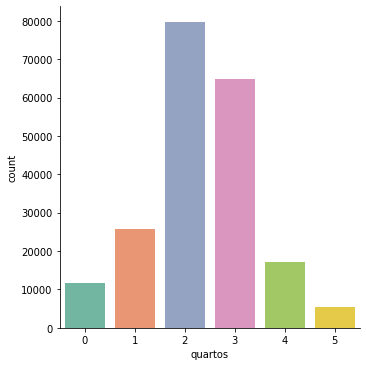

In [47]:
sns.catplot(x="quartos", kind="count", palette="Set2", data=df)

#### Obtendo o número de anúncios para cada número de banheiros 

In [38]:
df.banheiros.value_counts()

1    76630
2    57444
0    27395
3    21445
4    11355
5    10593
Name: banheiros, dtype: int64

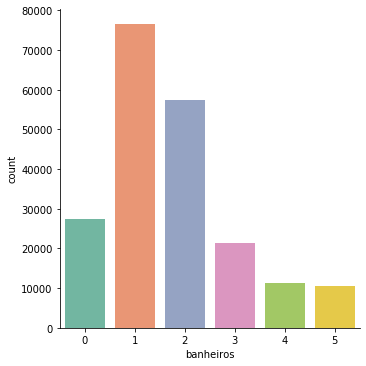

In [48]:
sns.catplot(x="banheiros", kind="count", palette="Set2", data=df)

#### Obtendo o número de anúncios para cada número de vagas na garagem 

In [39]:
df.vagas_garagem.value_counts()

1    82186
0    51537
2    44485
3    12068
4     8835
5     5745
6        5
7        1
Name: vagas_garagem, dtype: int64

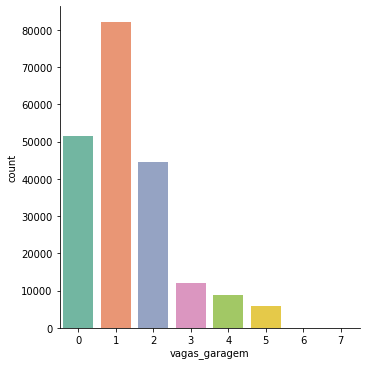

In [49]:
sns.catplot(x="vagas_garagem", kind="count", palette="Set2", data=df)